In [14]:
from summit import Runner
from summit.strategies import Random, SOBO, MultitoSingleObjective
from summit.benchmarks import SnarBenchmark
from summit.utils.dataset import DataSet
import matplotlib.pyplot as plt
import pathlib

In [2]:
exp = SnarBenchmark()
exp.domain

Name,Type,Description,Values
tau,"continuous, input",residence time in minutes,"[0.5,2]"
equiv_pldn,"continuous, input",equivalents of pyrrolidine,"[1.0,5]"
conc_dfnb,"continuous, input","concentration of 2,4 dinitrofluorobenenze at reactor inlet (after mixing) in M","[0.1,0.5]"
temperature,"continuous, input",Reactor temperature in degress celsius,"[30,120]"
sty,"continuous, maximize objective",space time yield (kg/m^3/h),"[0,13000]"
e_factor,"continuous, minimize objective",E-factor,"[0,500]"


In [8]:
# Create some test conditions
columns = [v.name for v in exp.domain.variables]
values  =   {('tau', 'DATA'): 1.5,  # minutes
             ('equiv_pldn', 'DATA'): 0.5,  
             ('conc_dfnb', 'DATA'): 0.1, #molar
             ('temperature', 'DATA'): 30.0, # degrees celsius
            }
conditions = DataSet([values], columns=columns)

# Run the conditions
exp.reset()
results = exp.run_experiments(conditions)
results.round(2)

,tau,equiv_pldn,conc_dfnb,temperature,sty,e_factor,computation_t,experiment_t,strategy
0,1.5,0.5,0.1,30.0,169.0,190.25,0.0,0.001146,NaN


/Users/ravikadambi/Desktop/Repos/Capstone/capstone/lib/python3.8/site-packages/summit/experiment.py:233: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  im = ax.scatter(


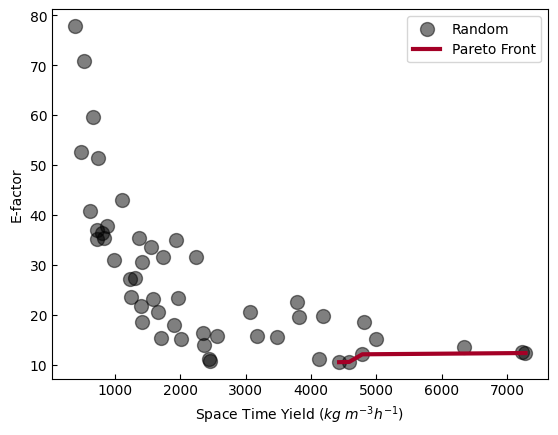

In [11]:
#Set up the experiment
exp = SnarBenchmark()

# Instantiate random sampling strategy
strategy = Random(exp.domain)

# Use the runner to run closed loop optimisation
r = Runner(strategy=strategy, experiment=exp, max_iterations=50)
r.run()

# Plot the results
fig, ax = exp.pareto_plot()
_ = ax.set_xlabel('Space Time Yield ($kg \; m^{-3} h^{-1}$)')
_ = ax.set_ylabel('E-factor')

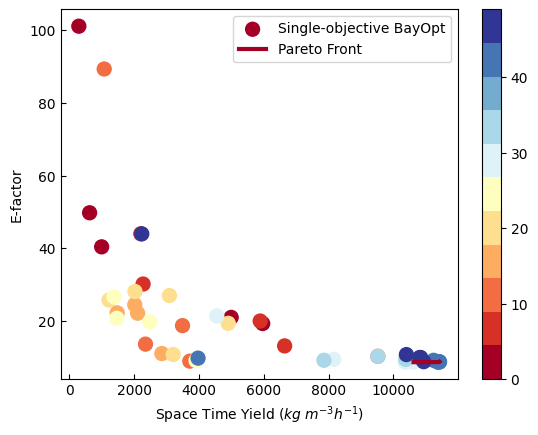

In [12]:
exp = SnarBenchmark()

# Since the Snar benchmark has two objectives and SOBO is single objective, 
# we need a multi-to-single objective transform
transform = MultitoSingleObjective(
    exp.domain, expression="-sty/1e4+e_factor/100", maximize=False
)

# Set up the strategy, passing in the optimisation domain and transform
strategy = SOBO(exp.domain, transform=transform)

# Use the runner to run closed loop optimisation
r = Runner(
    strategy=strategy, experiment=exp,max_iterations=50
)
r.run()

# Plot the results
fig, ax = exp.pareto_plot(colorbar=True)
_ = ax.set_xlabel('Space Time Yield ($kg \; m^{-3} h^{-1}$)')
_ = ax.set_ylabel('E-factor')

In [13]:
exp.pareto_data.round(2)

,tau,equiv_pldn,conc_dfnb,temperature,sty,e_factor,computation_t,experiment_t,strategy
29,0.536308,1.699389,0.5,66.049682,10625.565607,8.674045,0.877651,0.001597,Single-objective BayOpt
31,0.5,1.72644,0.5,65.973316,11383.358391,8.696337,0.629528,0.001585,Single-objective BayOpt
35,0.5,1.779176,0.5,65.786202,11401.611671,8.699996,0.552508,0.001572,Single-objective BayOpt
37,0.5,1.942528,0.5,65.514054,11422.460323,8.741801,0.535839,0.001551,Single-objective BayOpt
41,0.5,2.073253,0.5,63.47979,11427.619012,8.785868,0.575468,0.004139,Single-objective BayOpt


## Using real data


In [17]:
FOLDER = pathlib.Path("./data/")
# We are just going to get the domain from the SnarBenchmark
exp = SnarBenchmark()

transform = MultitoSingleObjective(
    exp.domain, expression="-sty/1e4+e_factor/100", maximize=False
)

# Instantiate SOBO
strategy = SOBO(exp.domain, transform=transform)

# To get the first experiments
next_experiments = strategy.suggest_experiments(2)
next_experiments

,tau,equiv_pldn,conc_dfnb,temperature,strategy
0,1.421731,3.344253,0.354236,108.940283,Single-objective BayOpt
1,1.377359,2.585450,0.435660,96.015871,Single-objective BayOpt


In [19]:
# Save SOBO hyperparameters and internal state
strategy.save(FOLDER / 'snar_sobo_external.json')

# Save experiments to CSV
next_experiments.to_csv(FOLDER / 'snar_experiments_external_0.csv')

In [20]:
# "Run" the experiments and save to CSV.
results = exp.run_experiments(next_experiments)
results.to_csv(FOLDER / 'snar_experiments_external_1.csv')

In [21]:
# Load in previous SOBO hyperparameters and internal state
strategy = SOBO.load(FOLDER / 'snar_sobo_external.json')

# Load in experimental results
prev_res = DataSet.read_csv(FOLDER / 'snar_experiments_external_1.csv')
prev_res

,tau,equiv_pldn,conc_dfnb,temperature,sty,e_factor,computation_t,experiment_t,strategy
0,1.421731,3.344253,0.354236,108.940283,1147.434035,32.766178,0.0,0.003693,Single-objective BayOpt
1,1.377359,2.58545,0.43566,96.015871,2282.631831,16.67404,0.0,0.00299,Single-objective BayOpt


In [23]:
# Get experimental suggestions from SOBO
second_experiments = strategy.suggest_experiments(1, prev_res=prev_res)

# Save SOBO state
strategy.save(FOLDER / 'snar_sobo_external_2.json')

# Save experiments to CSV
second_experiments.to_csv(FOLDER / 'snar_experiments_external_2.csv')
second_experiments

,tau,equiv_pldn,conc_dfnb,temperature,strategy
0,1.115209,2.676232,0.416714,95.57601,Single-objective BayOpt
